In [1]:
import numpy as np
from numpy import loadtxt
from statistics import stdev
import matplotlib.pyplot as plt
import pprint
import pandas as pd
from pprint import pprint
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

In [3]:
BigX=loadtxt("stripper_train_3.txt")
BigX1b=BigX
# for i in range(2,14):
#     next=loadtxt("stripper_data_"+str(i)+"b.txt")
#     BigX=np.concatenate((BigX,next),axis=0)

#BigX1b=np.concatenate((BigX1b,BigX2b),axis=0)
#print(BigX)
#print(type(BigX))
dim=len(BigX[0]) #number of cols
num_examples_train=len(BigX)
print(dim,num_examples_train)

# dim2b=len(BigX2b[0]) #number of cols
# num_examples_train2b=len(BigX2b)
# print(dim2b,num_examples_train2b)
# TestX=loadtxt("process_data_testing.txt")
# num_examples_test=len(TestX)
#print(dim,num_examples_test)
BigX_org=BigX

76 348


In [4]:
# def normaliser(genericData):
#     #normalising
#     min_indices=np.amin(genericData,axis=0)
#     #print(min_indices)
#     max_indices=np.amax(genericData,axis=0)
#     #print(max_indices)
#     diff_train=max_indices-min_indices
#     #print(diff_train)
#     check=(genericData-min_indices)/diff_train
#     #print(check)
#     data_normalised= tf.cast(check, tf.float32)
#     #print(train_data_normalised)
#     #print(type(train_data_normalised))
#     return data_normalised

'''
I will try to scale in a robust fashion since data may contain plenty of anomalies
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
'''
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [5]:
# transformerRS = RobustScaler().fit(BigX)
# transformerRS.transform(BigX)
scaling = RobustScaler()
BigX=scaling.fit_transform(BigX)
#RobustScaler(quantile_range=(25, 75)).fit_transform(BigX)
pprint(BigX)
pprint(BigX_org)
if(np.array_equal(BigX_org, BigX)):
    print("robust scaler not useful")

array([[ 1.41605446, -1.52249757,  0.        , ..., -1.07643041,
        -1.10439255, -1.04277602],
       [ 1.45585832, -1.38803624,  0.        , ..., -1.1057564 ,
        -1.05601046, -1.03773527],
       [ 1.44342859, -1.47518155,  0.        , ..., -1.09845247,
        -1.05398156, -0.99002406],
       ...,
       [-0.29838521,  0.92296174,  0.        , ...,  0.92425672,
         0.90920571,  0.93713135],
       [-0.27345392,  0.89780639,  0.        , ...,  0.93890276,
         0.95054558,  0.93731169],
       [-0.25556374,  0.92745377,  0.        , ...,  0.91997701,
         0.9365285 ,  0.94034669]])
array([[1.1028586e+01, 8.3787500e-01, 1.2360000e-02, ..., 1.9439188e+01,
        1.9453783e+01, 2.0169388e+01],
       [1.1029140e+01, 8.3832400e-01, 1.2360000e-02, ..., 1.9432274e+01,
        1.9465277e+01, 2.0170534e+01],
       [1.1028967e+01, 8.3803300e-01, 1.2360000e-02, ..., 1.9433996e+01,
        1.9465759e+01, 2.0181381e+01],
       ...,
       [1.1004724e+01, 8.4604100e-01, 1

In [6]:
# print(train_data_normalised)
#setting up parameters for autoencoder
nb_epoch = 1000
batch_size = 32
input_dim = dim #num of columns,6
#encoding_dim = 60
hidden_dim_1 = 65
hidden_dim_2= 55
bottleneck = 15
learning_rate = 1e-10
print("{:.15f}".format(learning_rate))

0.000000000100000


In [7]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

In [8]:
# #Encoder
# encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
# #encoder=tf.keras.layers.Dropout(0.2)(encoder)
# encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)

#encoder = tf.keras.layers.Dense(encoding_dim, activation="relu")(input_layer)
# encoder=tf.keras.layers.Dense(hidden_dim_1,activation="relu")(input_layer)
# encoder=tf.keras.layers.Dropout(0.2)(encoder)
# encoder=tf.keras.layers.Dense(hidden_dim_2,activation="relu")(encoder)
encoder= tf.keras.layers.Dense(bottleneck,activation="selu")(input_layer)
# # encoder=  tf.keras.layers.Dropout(0.2)(encoder)
# encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
# encoder = tf.keras.layers.Dense(hidden_dim_2, activation="relu")(encoder)

In [9]:
# # Decoder
# # decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
# # decoder=tf.keras.layers.Dropout(0.2)(decoder)
# decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoder)
# decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

# decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
# #decoder=tf.keras.layers.Dropout(0.2)(decoder)
# decoder = tf.keras.layers.Dense(encoding_dim, activation="relu")(decoder)
# decoder = tf.keras.layers.Dense(input_dim, activation="relu")(decoder)
decoder=tf.keras.layers.Dense(input_dim,activation="selu")(encoder)
# decoder=tf.keras.layers.Dropout(0.2)(decoder)
# decoder=tf.keras.layers.Dense(hidden_dim_1,activation="relu")(decoder)
# #decoder=tf.keras.layers.Dense(encoding_dim,activation="relu")(decoder)
# decoder=tf.keras.layers.Dense(input_dim,activation="relu")(decoder)
# justcheck=tf.keras.layers.Dense(6,activation="relu")(input_layer)

In [10]:
#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 76)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                1155      
_________________________________________________________________
dense_1 (Dense)              (None, 76)                1216      
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


In [11]:
# # callbacks for checkpoints and early stopping
# cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
#                                mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# # define our early stopping
# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     min_delta=0.0001,
#     patience=10,
#     verbose=1, 
#     mode='min',
#     restore_best_weights=True
#     )

In [12]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [13]:
history = autoencoder.fit(BigX, BigX,
                    epochs=nb_epoch,
                    shuffle=True,
                    ).history

Epoch 1/1000
11/11 [==============================] - 0s 698us/step - loss: 0.5035 - accuracy: 0.0098
Epoch 2/1000
11/11 [==============================] - 0s 499us/step - loss: 0.4064 - accuracy: 0.0051
Epoch 3/1000
11/11 [==============================] - 0s 499us/step - loss: 0.3229 - accuracy: 0.0077
Epoch 4/1000
11/11 [==============================] - 0s 598us/step - loss: 0.2500 - accuracy: 0.0189
Epoch 5/1000
11/11 [==============================] - 0s 598us/step - loss: 0.2102 - accuracy: 0.0101
Epoch 6/1000
11/11 [==============================] - 0s 499us/step - loss: 0.1549 - accuracy: 0.0308
Epoch 7/1000
11/11 [==============================] - 0s 498us/step - loss: 0.1232 - accuracy: 0.0689
Epoch 8/1000
11/11 [==============================] - 0s 998us/step - loss: 0.1036 - accuracy: 0.1109
Epoch 9/1000
11/11 [==============================] - 0s 598us/step - loss: 0.0891 - accuracy: 0.1240
Epoch 10/1000
11/11 [==============================] - 0s 698us/step - loss: 0.081

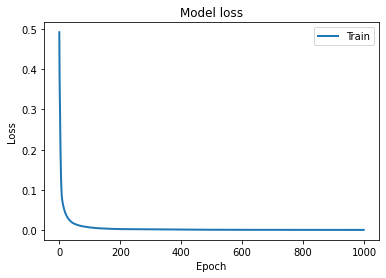

In [14]:
plt.plot(history['loss'], linewidth=2, label='Train')
#plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [15]:
train_x_predictions = autoencoder.predict(BigX)
#print(test_data_normalised,test_x_predictions)
#print(TestX)
mse = np.mean(np.power(BigX - train_x_predictions, 2), axis=1)
#print(mse)
#print(type(mse))

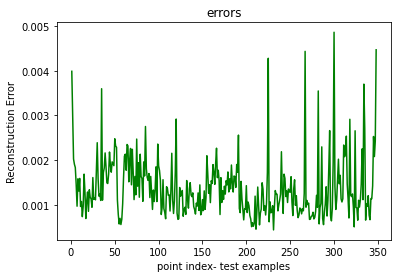

In [16]:
# data to be plotted
x = np.arange(1,len(BigX)+1)
#print(x)
#print(num_examples_test)

# plotting
plt.title("errors")
plt.xlabel("point index- test examples")
plt.ylabel("Reconstruction Error")
plt.plot(x, mse, color ="green")
plt.show()

In [17]:
# train_x_predictions = autoencoder.predict(BigX)
# #print(test_data_normalised,test_x_predictions)
# #print(BigX)
# mse_train = np.mean(np.power(BigX - train_x_predictions, 2), axis=1)

In [18]:
# x_train = np.arange(1, num_examples_train+1)
# #print(x)
# #print(num_examples_train)
 
# # plotting
# plt.title("errors")
# plt.xlabel("point index test examples")
# plt.ylabel("Reconstruction Error")
# plt.plot(x_train, mse_train, color ="green")
# plt.show()

In [19]:
# TestX=loadtxt("stripper_data_13b.txt")
# pprint(TestX)

In [20]:
Test_dict_1={}
for i in range (1,14):
    temp=loadtxt("./Stripper Circulation Testing 1/stripper_testing1_"+str(i)+".txt")
    Test_dict_1['Test1'+str(i)+'b']=scaling.transform(temp)
    
Test_dict_2={}
for i in range (1,14):
    temp=loadtxt("./Stripper Circulation Testing 2/stripper_testing2_"+str(i)+".txt")
    Test_dict_2['Test2'+str(i)+'b']=scaling.transform(temp)

    

In [21]:
test_predictions_1={}
for i in range(1,14):
    temp=autoencoder.predict(Test_dict_1['Test1'+str(i)+'b'])
    test_predictions_1['Test1'+str(i)+'b']=temp

test_predictions_2={}
for i in range(1,14):
    temp=autoencoder.predict(Test_dict_2['Test2'+str(i)+'b'])
    test_predictions_2['Test2'+str(i)+'b']=temp
    

# test_x_predictions = autoencoder.predict(TestX)

#print(test_data_normalised,test_x_predictions)
#print(TestX)
# mse2 = np.mean(np.power(TestX - test_x_predictions, 2), axis=1)
mse_1={}
for i in range(1,14):
    temp=np.mean(np.power(Test_dict_1['Test1'+str(i)+'b'] - test_predictions_1['Test1'+str(i)+'b'], 2), axis=1)
    mse_1['Test1'+str(i)+'b']=temp
    
mse_2={}
for i in range(1,14):
    temp=np.mean(np.power(Test_dict_2['Test2'+str(i)+'b'] - test_predictions_2['Test2'+str(i)+'b'], 2), axis=1)
    mse_2['Test2'+str(i)+'b']=temp

TESTING-1 plots


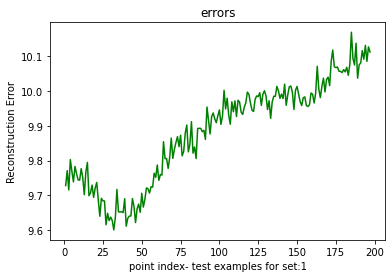

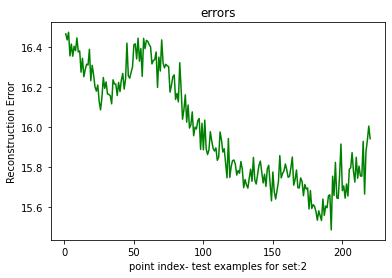

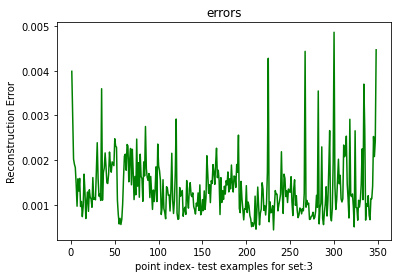

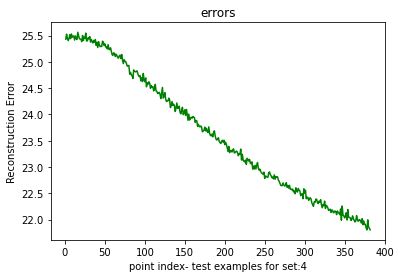

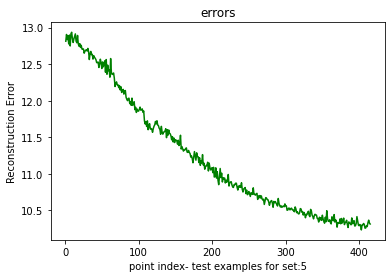

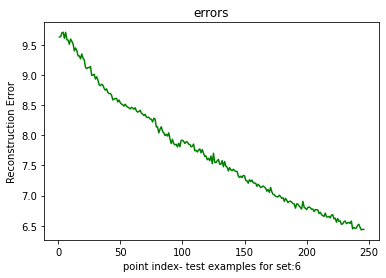

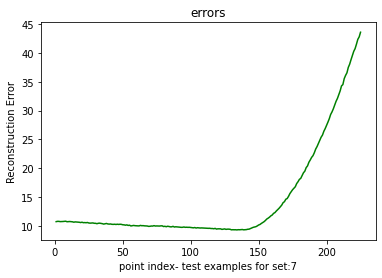

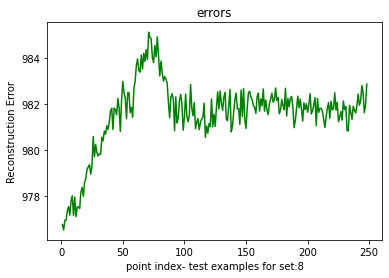

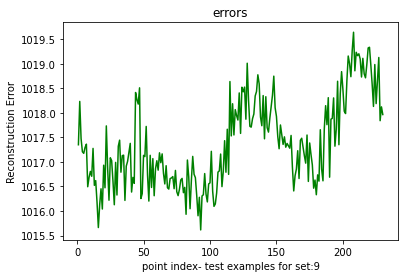

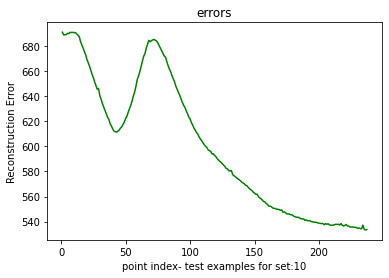

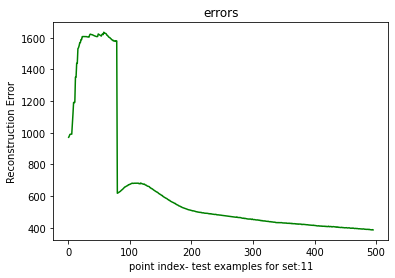

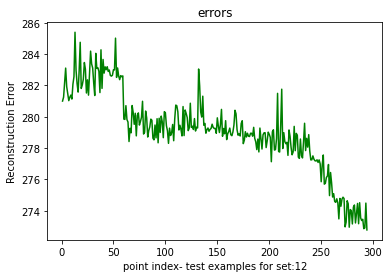

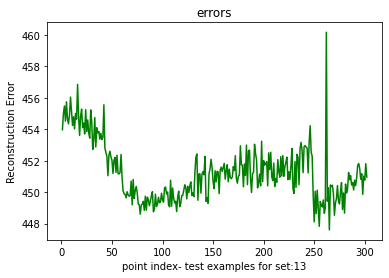

TESTING-2 plots


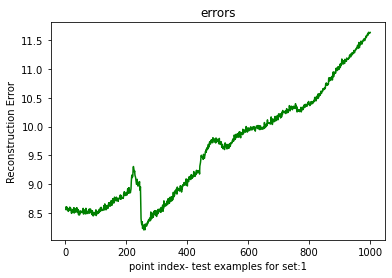

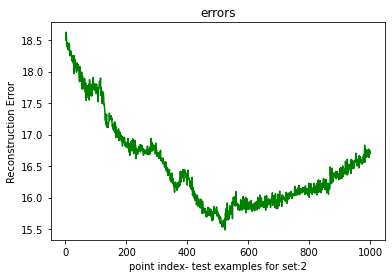

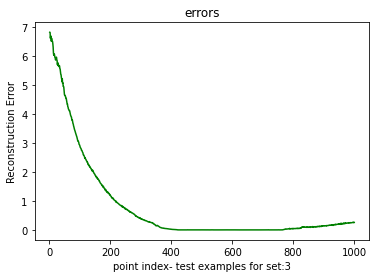

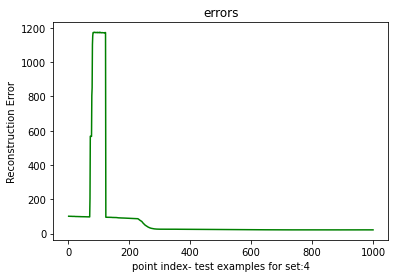

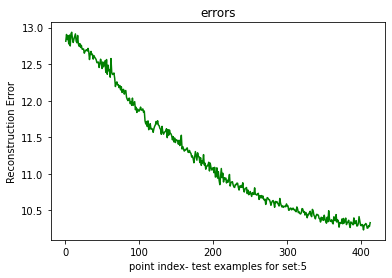

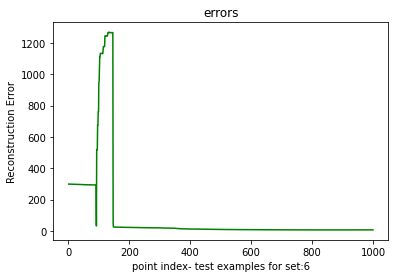

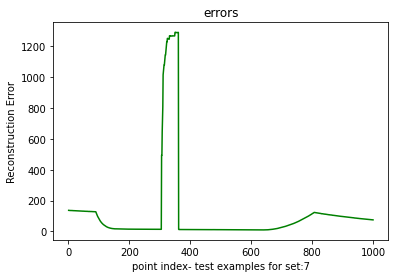

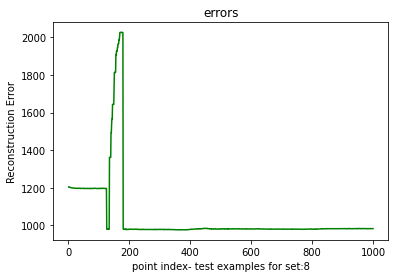

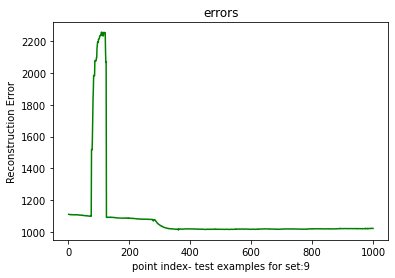

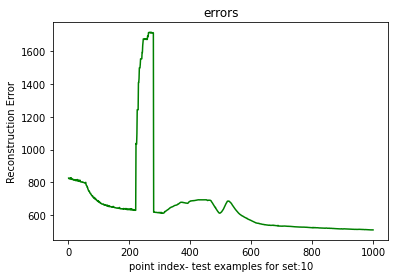

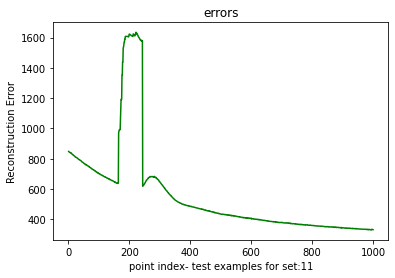

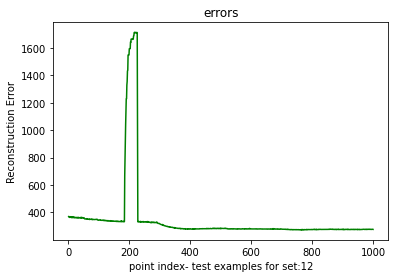

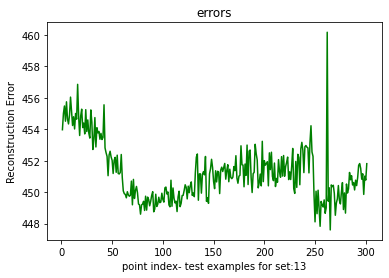

In [22]:
# data to be plotted
x_1={}
for i in range(1,14):
    x_1['Test1'+str(i)+'b'] = np.arange(1,len(Test_dict_1['Test1'+str(i)+'b'])+1)
    
x_2={}
for i in range(1,14):
    x_2['Test2'+str(i)+'b'] = np.arange(1,len(Test_dict_2['Test2'+str(i)+'b'])+1)
#print(x)
#print(num_examples_test)

# print("TESTING-1 plots")
# # plotting
# for i in range(1,14):
#     plt.title("errors")
#     plt.xlabel("point index- test examples for set:"+str(i))
#     plt.ylabel("Reconstruction Error")
#     plt.plot(x_1['Test1'+str(i)+'b'], mse_1['Test1'+str(i)+'b'], color ="green")
#     plt.show()
# # data to be plotted
# x_1={}
# for i in range(1,14):
#     x_1['Test1'+str(i)+'b'] = np.arange(1,len(Test_dict_1['Test1'+str(i)+'b'])+1)
    
# x_2={}
# for i in range(1,14):
#     x_2['Test2'+str(i)+'b'] = np.arange(1,len(Test_dict_2['Test2'+str(i)+'b'])+1)
# #print(x)
# #print(num_examples_test)

print("TESTING-1 plots")
# plotting
for i in range(1,14):
    plt.title("errors")
    plt.xlabel("point index- test examples for set:"+str(i))
    plt.ylabel("Reconstruction Error")
    plt.plot(x_1['Test1'+str(i)+'b'], mse_1['Test1'+str(i)+'b'], color ="green")
    plt.show()
    
print("TESTING-2 plots")
# plotting
for i in range(1,14):
    plt.title("errors")
    plt.xlabel("point index- test examples for set:"+str(i))
    plt.ylabel("Reconstruction Error")
    plt.plot(x_2['Test2'+str(i)+'b'], mse_2['Test2'+str(i)+'b'], color ="green")
    plt.show()

In [24]:
#best up until now, saving!
autoencoder.save("best_selu_based")

INFO:tensorflow:Assets written to: best_selu_based\assets
